In [4]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import scipy.special
import json
import subprocess
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def cubic_bezier_point(p0, p1, p2, p3, t):
    p0 = np.array(p0)
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    return (
        (1 - t) ** 3 * p0
        + 3 * (1 - t) ** 2 * t * p1
        + 3 * (1 - t) * t**2 * p2
        + t**3 * p3
    )


# 3次ベジェ曲線をプロットする
def plot_3d_bezier(cubic_beziers, original_points=None):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")
    t_values = np.linspace(0, 1, 300)

    if original_points is not None:
        original_x = [p[0] for p in original_points]
        original_y = [p[1] for p in original_points]
        original_z = [p[2] for p in original_points]
        ax.scatter(
            original_x,
            original_y,
            original_z,
            color="blue",
            marker=".",
            s=10,
            alpha=0.1,
            label="元の点",
        )

    for i, cubic in enumerate(cubic_beziers):
        curve = [cubic_bezier_point(*cubic, t) for t in t_values]
        ctrl_x = [p[0] for p in cubic]
        ctrl_y = [p[1] for p in cubic]
        ctrl_z = [p[2] for p in cubic]

        ax.plot(
            *zip(*curve),
            color="orange",
            ls="--",
            alpha=0.8,
            label="3次ベジェ" if i == 0 else None
        )
        ax.scatter(
            ctrl_x,
            ctrl_y,
            ctrl_z,
            color="cyan",
            marker="o",
            s=50,
            alpha=0.5,
            label="3次制御点" if i == 0 else None,
        )

    ax.set_title("3次元ベジェ曲線と制御点")
    ax.set_xlabel("X軸")
    ax.set_ylabel("Y軸")
    ax.set_zlabel("Z軸")
    ax.grid()
    ax.legend()
    plt.tight_layout()
    plt.show()

3d.swift:99:9: warning: variable 'p1' was never mutated; consider changing to 'let' constant
 97 | func fitCubicBezier3D(points: [SIMD3<Double>]) -> [SIMD3<Double>] {
 98 |     guard let p0 = points.first, let p3 = points.last else { return [] }
 99 |     var p1 = p0 + 0.3 * (p3 - p0)
    |         `- warning: variable 'p1' was never mutated; consider changing to 'let' constant
100 |     var p2 = p0 + 0.7 * (p3 - p0)
101 |     let n = points.count

3d.swift:100:9: warning: variable 'p2' was never mutated; consider changing to 'let' constant
 98 |     guard let p0 = points.first, let p3 = points.last else { return [] }
 99 |     var p1 = p0 + 0.3 * (p3 - p0)
100 |     var p2 = p0 + 0.7 * (p3 - p0)
    |         `- warning: variable 'p2' was never mutated; consider changing to 'let' constant
101 |     let n = points.count
102 |     let tValues = (0..<n).map { Double($0) / Double(n - 1) }

3d.swift:153:13: warning: variable 'curr' was never mutated; consider changing to 'let' constant
151

[3D] 元のデータをJSONファイルに保存しました: /Users/kanakanho/src/visionpro/3d-bezier-curve/original_points_3d.json
[3D] 曲率ベースで分割されたセグメント数: 145
[3D] セグメント 0: 11 点
[3D] セグメント 1: 10 点
[3D] セグメント 2: 57 点
[3D] セグメント 3: 10 点
[3D] セグメント 4: 10 点
[3D] セグメント 5: 51 点
[3D] セグメント 6: 10 点
[3D] セグメント 7: 57 点
[3D] セグメント 8: 10 点
[3D] セグメント 9: 50 点
[3D] セグメント 10: 10 点
[3D] セグメント 11: 10 点
[3D] セグメント 12: 43 点
[3D] セグメント 13: 10 点
[3D] セグメント 14: 10 点
[3D] セグメント 15: 10 点
[3D] セグメント 16: 39 点
[3D] セグメント 17: 10 点
[3D] セグメント 18: 10 点
[3D] セグメント 19: 10 点
[3D] セグメント 20: 10 点
[3D] セグメント 21: 34 点
[3D] セグメント 22: 10 点
[3D] セグメント 23: 10 点
[3D] セグメント 24: 10 点
[3D] セグメ���ト 25: 10 点
[3D] セグメント 26: 31 点
[3D] セグメント 27: 10 点
[3D] セグメント 28: 10 点
[3D] セグメント 29: 10 点
[3D] セグメント 30: 33 点
[3D] セグメント 31: 10 点
[3D] セグメント 32: 10 点
[3D] セグメント 33: 10 点
[3D] セグメント 34: 32 点
[3D] セグメント 35: 10 点
[3D] セグメント 36: 10 点
[3D] セグメント 37: 10 点
[3D] セグメント 38: 10 点
[3D] セグメント 39: 10 点
[3D] セグメント 40: 21 点
[3D] セグメント 41: 10 点
[3D] セグメント 42: 10 点
[3D] セグメント 43: 10 点
[

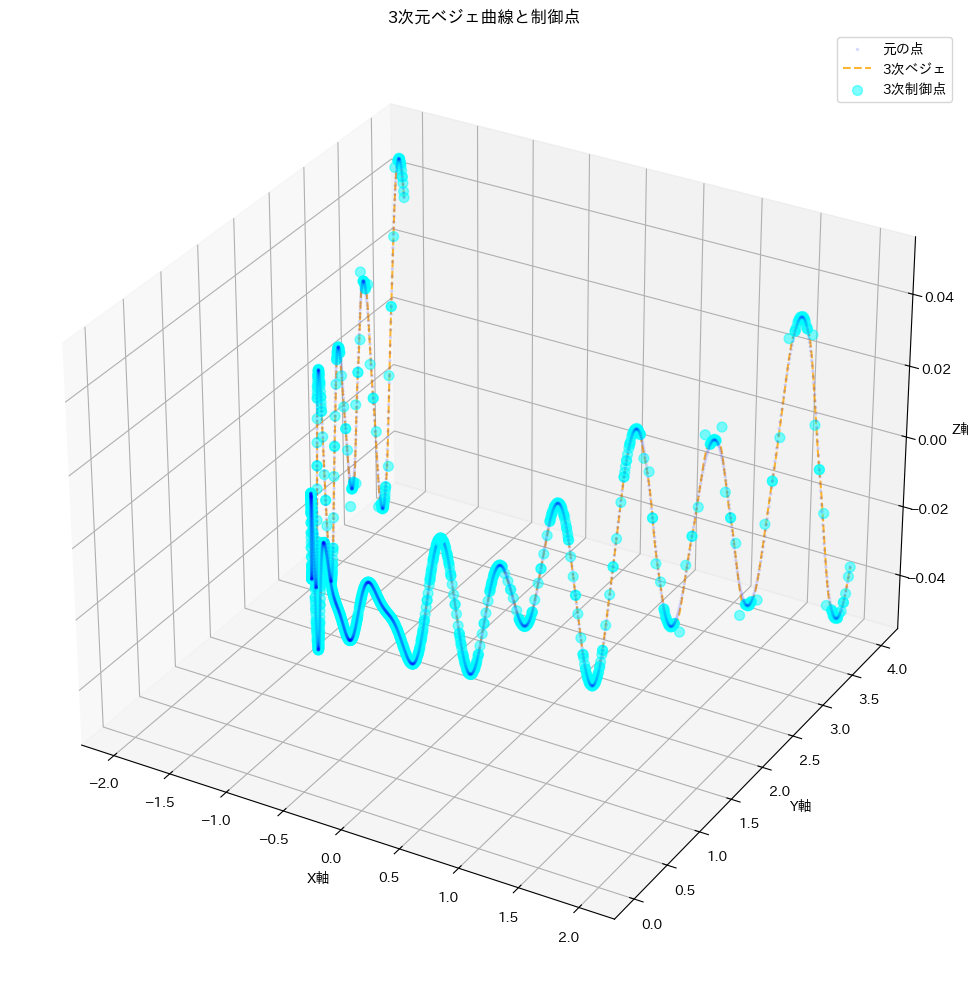

In [6]:
result = subprocess.run(["swift", "3d.swift"])
# result = subprocess.run(["swift", "run", "3d-b.swift"])

cubic_beziers = []
# with open("cubic_segments_3d.json", "r", encoding="utf-8") as f:
with open("cubic_segments_3d_curvature.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)
    for segment in json_data:
        p0 = segment["p0"]
        p1 = segment["p1"]
        p2 = segment["p2"]
        p3 = segment["p3"]
        cubic_beziers.append(
            (
                (p0["x"], p0["y"], p0["z"]),
                (p1["x"], p1["y"], p1["z"]),
                (p2["x"], p2["y"], p2["z"]),
                (p3["x"], p3["y"], p3["z"]),
            )
        )


original_points = []
with open("original_points_3d.json", "r", encoding="utf-8") as f:
    json_data = json.load(f)
    """
    [
    {
        "y" : 2.301418259191532,
        "x" : -5,
        "z" : -125
    },
    {
        "y" : 2.30888188037134,
        "z" : -124.25149900000001,
        "x" : -4.99
    },
    ]
    """
    for point in json_data:
        original_points.append((point["x"], point["y"], point["z"]))


plot_3d_bezier(cubic_beziers, original_points=original_points)
